In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex2data1.txt", names=['score1', 'score2', 'result'])

In [3]:
data.head()

score1     score2  result
0  34.623660  78.024693       0
1  30.286711  43.894998       0
2  35.847409  72.902198       0
3  60.182599  86.308552       1
4  79.032736  75.344376       1

#### Visualizing the data

In [4]:
pos= data[data['result']==1]
neg=data[data['result']==0]

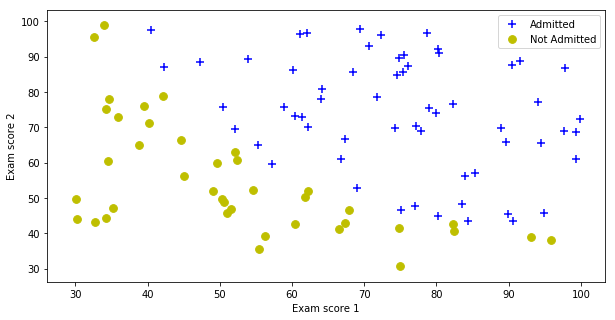

In [5]:
plt.figure(figsize=[10,5])
plt.scatter(pos.score1, pos.score2, marker='+',c='b', s=60, label='Admitted') # c=color, s=size
plt.scatter(neg.score1, neg.score2, marker='o',c='y',s=60, label='Not Admitted')
plt.legend()
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')
plt.show()

In [6]:
xdata= pd.DataFrame()
inter= np.ones(len(data.result))
xdata['i']=inter
xdata[['score1', 'score2']]= data[['score1', 'score2']]

In [7]:
x= np.asarray(xdata)
y= np.asarray(data['result'])

#### Logistic regression hypothesis: Sigmoid function

In [8]:
def sigmoid(z):
    return (1/(1+ np.exp(-z)))

#### Cost Function

In [9]:
def cost(theta,x,y):
    
    m= len(y)
    h= sigmoid(x.dot(theta)) # 100 by 3 , 3 by 1 = 100 by 1
    cost= (-(y.T.dot(np.log(h))) - (1-y).T.dot(np.log(1-h)))*(1/m) # 1 by 100, 100 by 1 = 1 by 1 
    

    return cost

In [10]:
theta = np.array([0,0,0])
cost(theta,x,y)

0.6931471805599452

#### Gradient Descent

In [11]:
def gradient(theta,x,y):
   
    m=len(y)
    h= sigmoid(x.dot(theta.T)) # 100 by 3 , 3 by 1 = 100 by 1  
    grad= x.T.dot(h-y)*(1/m) # 3 by 100, 100 by 1 = 3 by 1
    
    return grad.flatten()

In [12]:
gradient(theta,x,y)

array([ -0.1       , -12.00921659, -11.26284221])

#### Minimze function to find the best parameter for Logistic Regression cost function

In [13]:
from scipy.optimize import minimize

In [14]:
param = minimize(cost, theta, args=(x,y), jac=gradient, options={'maxiter':400})
param

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.2034977015894438
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476820e-09, -9.31921318e-07, -2.82608928e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [15]:
def predict(theta, x):
    pred= sigmoid(x.dot(theta.T)) # 1 by 3 , 3 by 1= 1 by 1
    return pred

In [16]:
a=np.array([1,45,85])

In [22]:
predict(param.x,a) #sigmoid(-25 + (45*0.206) + (85 * 0.2014))

0.7762907240588947

In [146]:
def plot_decision_boundary(x1, x2, optimized_param):
    
    x1_min, x1_max = x1.min(), x1.max(),
    x2_min, x2_max = x2.min(), x2.max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(optimized_param))
    h = h.reshape(xx1.shape)

    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='black');

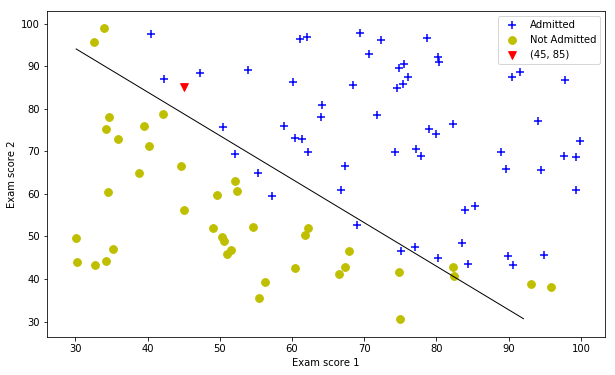

In [147]:
plt.figure(figsize=[10,6])

plt.scatter(pos.score1, pos.score2, marker='+',c='b', s=60, label='Admitted') # c=color, s=size
plt.scatter(neg.score1, neg.score2, marker='o',c='y',s=60, label='Not Admitted')
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plot_decision_boundary(data['score1'], data['score2'], param.x)
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')
plt.legend()
plt.show()

### Regularized logistic regression

In [49]:
data2= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex2data2.txt", names=['test1', 'test2', 'result'])

In [50]:
data2.head()

test1    test2  result
0  0.051267  0.69956       1
1 -0.092742  0.68494       1
2 -0.213710  0.69225       1
3 -0.375000  0.50219       1
4 -0.513250  0.46564       1

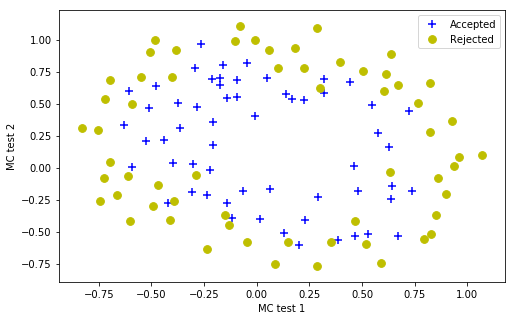

In [51]:
pos2= data2[data2['result']==1]
neg2=data2[data2['result']==0]
plt.figure(figsize=[8,5])
plt.scatter(pos2.test1, pos2.test2, marker='+',c='b', s=60, label='Accepted') # c=color, s=size
plt.scatter(neg2.test1, neg2.test2, marker='o',c='y',s=60, label='Rejected')
plt.legend()
plt.xlabel('MC test 1')
plt.ylabel('MC test 2')
plt.show()

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
polynomial= PolynomialFeatures(6)
x2= polynomial.fit_transform(data2[['test1', 'test2']])

In [54]:
x2.shape

(118, 28)

In [55]:
y2=np.asarray(data2[['result']])

In [56]:
x2[:1]

array([[1.00000000e+00, 5.12670000e-02, 6.99560000e-01, 2.62830529e-03,
        3.58643425e-02, 4.89384194e-01, 1.34745327e-04, 1.83865725e-03,
        2.50892595e-02, 3.42353606e-01, 6.90798869e-06, 9.42624411e-05,
        1.28625106e-03, 1.75514423e-02, 2.39496889e-01, 3.54151856e-07,
        4.83255257e-06, 6.59422333e-05, 8.99809795e-04, 1.22782870e-02,
        1.67542444e-01, 1.81563032e-08, 2.47750473e-07, 3.38066048e-06,
        4.61305487e-05, 6.29470940e-04, 8.58939846e-03, 1.17205992e-01]])

#### Regularized Cost Function

In [57]:
def cost_func(theta, reg, x, y):
    m=len(y)
    h=sigmoid(x.dot(theta))
    cost= ((-(y.T.dot(np.log(h))) - (1-y).T.dot(np.log(1-h)))*(1/m)) + ((np.sum(theta[1:]**2))*(reg/(2*m)))
    return cost[0]

In [58]:
theta2= np.zeros(x2.shape[1]) # 1 for column size

In [59]:
cost_func(theta2, 1, x2,y2 )

0.6931471805599453

#### Regularized Gradient Descent

In [60]:
def grad_desc(theta,reg,x,y):
   
    m=len(y)
    h= sigmoid(x.dot(theta.reshape(-1,1)))
    grad= (x.T.dot(h-y)*(1/m)) +(reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return grad.flatten()

In [61]:
grad=grad_desc(theta2,1,x2,y2)

#### Minimize function to find best parameters

In [75]:
param2 = minimize(cost_func, theta2, args=(1, x2, y2), method=None, jac=grad_desc, options={'maxiter':3000})
param2.x

array([ 1.27268739,  0.62557016,  1.1809665 , -2.01919822, -0.91761468,
       -1.43194199,  0.12375921, -0.36513086, -0.35703388, -0.17485805,
       -1.45843772, -0.05129676, -0.61603963, -0.2746414 , -1.19282569,
       -0.24270336, -0.20570022, -0.04499768, -0.27782709, -0.29525851,
       -0.45613294, -1.04377851,  0.02762813, -0.29265642,  0.01543393,
       -0.32759318, -0.14389199, -0.92460119])

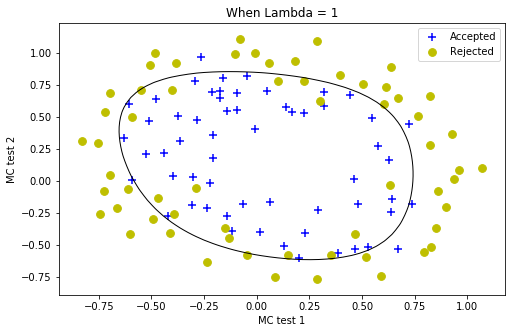

In [149]:
pos2= data2[data2['result']==1]
neg2=data2[data2['result']==0]

plt.figure(figsize=[8,5])
plt.scatter(pos2.test1, pos2.test2, marker='+',c='b', s=60, label='Accepted') # c=color, s=size
plt.scatter(neg2.test1, neg2.test2, marker='o',c='y',s=60, label='Rejected')

x1_min, x1_max = data2['test1'].min(), data2['test1'].max(),

x2_min, x2_max = data2['test2'].min(), data2['test2'].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

h = sigmoid(polynomial.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(param2.x))
h = h.reshape(xx1.shape)

plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='black');

plt.legend()
plt.xlabel('MC test 1')
plt.ylabel('MC test 2')
plt.title("When Lambda = 1")
plt.show()

### Logistic Regression using Scikit learn

In [79]:
from sklearn.model_selection import train_test_split

##### Split dataset into train and test set:

In [80]:
xtrain, xtest, ytrain, ytest= train_test_split(x2, y2, test_size=0.2, random_state=4)

###### C: Inverse of regularization strength. 
default: 1.0
###### Solver: Algorithm to use in the optimization problem. 
Options: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’} default: ‘liblinear'


In [132]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(C=100, solver='liblinear').fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
LR.intercept_, LR.coef_

(array([1.82]),
 array([[ 1.82,  1.82,  4.38, -5.44, -6.62, -6.44,  1.65, -0.28,  3.32,
         -0.83, -3.85,  3.43, -1.48, -1.99, -7.54, -2.03, -0.12,  7.21,
         -4.47, -4.49,  3.69, -5.08,  1.5 ,  0.38,  2.87, -3.83, -3.74,
         -0.16]]))

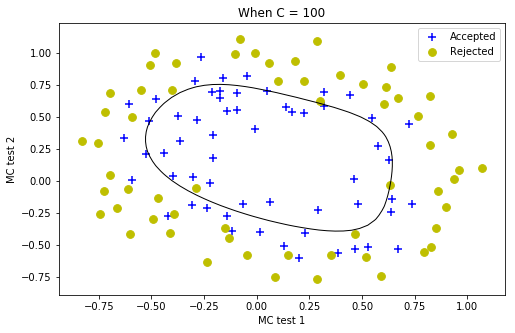

In [148]:
pos2= data2[data2['result']==1]
neg2=data2[data2['result']==0]

plt.figure(figsize=[8,5])
plt.scatter(pos2.test1, pos2.test2, marker='+',c='b', s=60, label='Accepted') # c=color, s=size
plt.scatter(neg2.test1, neg2.test2, marker='o',c='y',s=60, label='Rejected')

x1_min, x1_max = data2['test1'].min(), data2['test1'].max(),

x2_min, x2_max = data2['test2'].min(), data2['test2'].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

h = sigmoid(polynomial.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(LR.coef_.T))
h = h.reshape(xx1.shape)

plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='black');

plt.legend()
plt.xlabel('MC test 1')
plt.ylabel('MC test 2')
plt.title("When C = 100")
plt.show()

#### Prediction on test data

In [134]:
yhat= LR.predict(xtest)

In [135]:
yhat[:4]

array([1, 1, 0, 1], dtype=int64)

In [136]:
yhat_prob=LR.predict_proba(xtest)

In [137]:
yhat_prob[:4]

array([[0.49, 0.51],
       [0.08, 0.92],
       [0.77, 0.23],
       [0.04, 0.96]])

### Evaluation
#### Jaccard Method

In [143]:
from sklearn.metrics import jaccard_similarity_score
print("Accuracy: " ,jaccard_similarity_score(ytest, yhat))

Accuracy:  0.8333333333333334


#### Confusion Matrix

In [127]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(ytest, yhat, labels=[1,0]))

[[11  2]
 [ 2  9]]


Confusion matrix, without normalization
[[11  2]
 [ 2  9]]


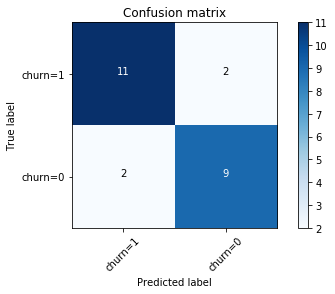

In [128]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')